In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from collections import defaultdict
from collections import deque

import random

import itertools
import numpy as np
from tqdm import tqdm

import math

from numpy.core.multiarray import fromstring  

from copy import deepcopy

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
df1_test = pd.read_csv("drive/MyDrive/uh/tests/testgraph_1.txt", sep = ' |\t', names = ['v1', 'v2'])
df2_test = pd.read_csv("drive/MyDrive/uh/tests/testgraph_2.txt", sep = ' |\t', names = ['v1', 'v2'])
df3_test = pd.read_csv("drive/MyDrive/uh/tests/testgraph_3.txt", sep = ' |\t', names = ['v1', 'v2'])
df4_test = pd.read_csv("drive/MyDrive/uh/tests/testgraph_4.txt", sep = ' |\t', names = ['v1', 'v2'])
df5_test = pd.read_csv('drive/MyDrive/uh/tests/testgraph_5.txt', sep = ' |\t', names = ['v1', 'v2'])
df6_test = pd.read_csv("drive/MyDrive/uh/tests/testgraph_6.txt", sep = ' |\t', names = ['v1', 'v2'])
df7_test = pd.read_csv('drive/MyDrive/uh/tests/testgraph_7.txt', sep = ' |\t', names = ['v1', 'v2'])

df_team_15 = pd.read_csv('drive/MyDrive/uh/tests/team_15.txt', sep = ' |\t', names = ['v1', 'v2'])
df6_98 = pd.read_csv("drive/MyDrive/uh/tests/socfb-Reed98.txt", sep = ' |\t', names = ['v1', 'v2'])
df7_45 = pd.read_csv('drive/MyDrive/uh/tests/socfb-Middlebury45.txt', sep = ' |\t', names = ['v1', 'v2'])

# df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
# df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
# df3 = pd.read_csv("drive/MyDrive/uh/out.soc-sign-bitcoinotc", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'weight', 'timestamp'])
# df4 = pd.read_csv("drive/MyDrive/uh/out.dnc-corecipient", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'timestamp'])
# df5 = pd.read_csv('drive/MyDrive/uh/out.email-Eu-core-temporal.txt', sep = ' |\t',  names = ['v1', 'v2', 'timestamp'])

# for i in range(len(list_of_name)):
#     filename = 'drive/MyDrive/no_graphs_v/' + list_of_name[i] + '.cvc'
#     print(filename)
#     locals()[f'p{i+1}'] = pd.read_csv(filename)

In [25]:
# list_of_name = ["opsahl-ucsocial", "radoslaw_email_email","soc-sign-bitcoinotc","dnc-corecipient", 'email-Eu-core-temporal.txt']
# list_of_name = ["test_1", "test_2", "test_3", "test_4", "test_5", "test_6", "test_7", "team_15", "socfb-Reed98", "socfb-Middlebury45"]
list_of_name = ["test_6","test_1", "test_2", "test_3", "test_4", "test_5", "team_15", "socfb-Reed98", "socfb-Middlebury45"]

In [26]:
# list_of_df = [df1,df2,df3,df4,df5]
# list_of_df = [df1_test, df2_test, df3_test, df4_test, df5_test, df6_test, df7_test, df_team_15, df6_98, df7_45]
list_of_df = [df6_test,df1_test, df2_test, df3_test, df4_test, df5_test, df_team_15, df6_98, df7_45]

**1. Считаем число вершин, число рёбер, плотность (отношение числа рёбер к максимально
возможному числу рёбер), число компонент слабой связности, долю вершин в
максимальной по мощности компоненте слабой связности.**

In [6]:
def dfs_and_gcc(edges, neighbours, vertexes, max_component=False):
#на вход подается неориентированный список смежности
    access_vertexes = deque()
    visited = set()
    connected_components = defaultdict(set)
    connected_components_number = 0
    for vertex in vertexes:
        if vertex not in visited:
            connected_components_number += 1
            access_vertexes.append(vertex)
            while access_vertexes:
                u = access_vertexes.pop()
                for v in neighbours[u]:
                    if v not in visited:
                        access_vertexes.append(v)
                        visited.add(v)
                connected_components[connected_components_number].add(u)
                visited.add(u)
    if max_component:
        ind_max_component = max(connected_components, key=lambda num: len(connected_components[num]))
        return connected_components_number, ind_max_component, connected_components
    return connected_components_number, connected_components

In [23]:
def task_1(df):
    vertexes = (set(df.v2.unique()) | set(df.v1.unique()))
    number_of_vertexes = len(vertexes)
    number_of_edges_directed =df.shape[0] 
    edges = sorted(set(zip((df[['v1','v2']]).min(axis = 1), (df[['v1','v2']]).max(axis = 1))))
    number_of_edges_undirected = len(edges)
    density = number_of_edges_directed / ((number_of_vertexes*(number_of_vertexes - 1))/2)
    return vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density

In [8]:
def get_neighbours(edges):
  neighbours = defaultdict(set)
  for edge in edges:
    if edge[0] != edge[1]:
      neighbours[edge[0]].add(edge[1])
      neighbours[edge[1]].add(edge[0])
  return neighbours

2


In [9]:
def random_vert(vertexes,count_vert): #функция рандома
  if len(vertexes) < count_vert:
     count_vert = len(vertexes)
  number_of_vertices = sorted(random.sample(vertexes, count_vert))
  return number_of_vertices

In [10]:
def graph_snowball(graph,vertexes): #выбираются 2 рандомных вершины(ИЗ КОМПОНЕНТЫ СЛАБ СВЯЗ) и к ним их соседей добавлем
  random_nodes = random_vert(vertexes,2)
  new_nodes = [] 
  for v in random_nodes:
    new_nodes.append(v)

  for v in new_nodes:
    for u in graph[v]:
      if u not in new_nodes :
        new_nodes.append(u)
        if len(new_nodes) >= 500:
          return new_nodes
  return new_nodes

In [11]:
def bfs_distances(graph,start_u): #бфс с подсчетом расстояний
  dist = dict()
  dist[start_u] = 0
  access_vertexes = deque()
  access_vertexes.append(start_u)
  k= 0 
  while access_vertexes:
      current_node = access_vertexes.popleft()
      for v in graph[current_node]:
        k += 1
        if v not in dist:
          access_vertexes.append(v)
          dist[v] = dist[current_node] + 1
  return dist

In [12]:
def approx_diam_rad_per(graph,rand_nodes): #приближенные радиус, диаметр, 90пер 
   d = 0
   r = 1e+10
   list_with_eccentricities = []
   distances = []
   for vertex in rand_nodes:
        current_geo = bfs_distances(graph, vertex)
        distances += list(current_geo.values())
        list_with_eccentricities.append(max(current_geo.values()))

   approx_radius = min(list_with_eccentricities)
   approx_diameter = max(list_with_eccentricities)

   distances.sort()
   n = len(distances)
   approx_percentile = distances[round(n * (90 / 100)) - 1]
   return approx_radius,approx_diameter,approx_percentile

3,4


In [13]:
def adj_cvc_graph(graph, cvc):
  cc = graph.loc[graph.v1.isin(cvc) & graph.v2.isin(cvc)]
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [14]:
def get_acc(graph, cvc, edges):
#graph - dataframe (v1 v2 weight timelable)
#cvc - component of weak connectivity (list)
#acc - average cluster coefficient
  acc = 0
  n = len(cvc)

  adj = adj_cvc_graph(graph, cvc)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbours(edges)

  for u in cvc:
    deg = len(node_neighbors[u])
    if deg <= 1: continue
    
    l_u = np.sum([len(set.intersection(node_neighbors[v], node_neighbors[u])) for v in node_neighbors[u]]) / 2
    
    acc += (2 * l_u) / (deg * (deg-1))

  return float(acc) / n

In [15]:
def adj_graph(graph):
  cc = graph
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

4. Коэффициент ассортативности по степени вершин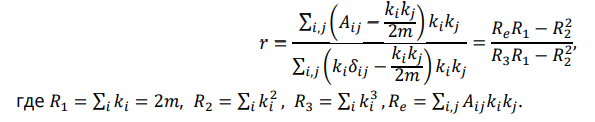

In [16]:
def get_pcc(graph, edges):
#graph - dataframe (v1 v2 weight timelable)
#pcc - Pearson correlation coefficient.
  adj = adj_graph(graph)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbours(edges)

  r_1 = adj.shape[0]
  # r_1 = 0
  r_2 = 0
  r_3 = 0
  r_e = 0
  # for u in tqdm(nodes):
  for u in nodes:
    k = len(node_neighbors[u])
    # r_1 += k
    r_2 += math.pow(k, 2)
    r_3 += math.pow(k, 3)
    for v in node_neighbors[u]:
      r_e += len(node_neighbors[u]) * len(node_neighbors[v])
  
  r = float((r_e * r_1 - math.pow(r_2, 2))) / (r_3 * r_1 - math.pow(r_2, 2))
  return r

In [28]:
i = 0
for df in list_of_df: # Для каждого датасета определение макс компоненты слаб связ, диаметра + радиуса + 90 перцентиля - для n - рандомных вершин и подграфа "снежный ком"
  print("Название датасета: ", list_of_name[i])
  i += 1
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)
  neighbours = get_neighbours(edges)

  print("Число вершин: ", number_of_vertexes)
  print("Число направленных рёбер: ", number_of_edges_directed)
  print("Число ненаправленных рёбер: ", number_of_edges_undirected)
  print("Плотность: ", density)

  connected_components_number, ind_max_component, connected_components = dfs_and_gcc(edges, neighbours, vertexes, True)
  
  print("Число компонент слабой связности: ", connected_components_number)

  max_com_sviaz = connected_components[ind_max_component]

  # graph = init_graph(max_com_sil_sviaz,edges)
  graph = neighbours

  random_nodes = random_vert(max_com_sviaz,500)
  snowball_nodes = graph_snowball(graph,vertexes) 

  #if df.shape(0) > 1000: 
  if number_of_vertexes > 20000:
    diam_rad_per = approx_diam_rad_per(graph,random_nodes)
    a = min(500, len(max_com_sviaz))

    print()
    print("Для подграфа с", a, "рандомными вершинами из компоненты связности:", sep = ' ')
    print("Диаметр: ", diam_rad_per[1])
    print("Радиус: ", diam_rad_per[0])
    print("90 процентиль: ",diam_rad_per[2],"\n")

    diam_rad_per = approx_diam_rad_per(graph,snowball_nodes)

    print("Для подграфа \"снежный ком\":")
    print("Диаметр: ", diam_rad_per[1])
    print("Радиус: ", diam_rad_per[0])
    print("90 процентиль: ", diam_rad_per[2],"\n")
    
  else:
    diam_rad_per = approx_diam_rad_per(graph,vertexes)
    a = len(vertexes)
    print()
    print("Для графа с", a, " вершинами:", sep = ' ')
    print("Диаметр: ", diam_rad_per[1])
    print("Радиус: ", diam_rad_per[0])
    print("90 процентиль: ",diam_rad_per[2],"\n")

  

  # diam_rad_per = approx_diam_rad_per(graph,snowball_nodes)

  # print("Для подграфа \"снежный ком\":")
  # print("Диаметр: ", diam_rad_per[0])
  # print("Радиус: ", diam_rad_per[1])
  # print("90 процентиль: ", diam_rad_per[2],"\n")

  cvc = connected_components[ind_max_component]
  acc = get_acc(df, cvc, edges)
  pcc = get_pcc(df, edges)

  print('acc: ', acc)
  print('pcc: ', pcc)
  print('---------------------------------------------------------------------')
  print('\n')

Название датасета:  test_6
Число вершин:  19428
Число направленных рёбер:  96662
Число ненаправленных рёбер:  96662
Плотность:  0.000512214581272078
Число компонент слабой связности:  23

Для графа с 19428  вершинами:
Диаметр:  11
Радиус:  1
90 процентиль:  6 

acc:  0.0
pcc:  -0.19155705078320998
---------------------------------------------------------------------


Название датасета:  test_1
Число вершин:  9
Число направленных рёбер:  13
Число ненаправленных рёбер:  13
Плотность:  0.3611111111111111
Число компонент слабой связности:  1

Для графа с 9  вершинами:
Диаметр:  3
Радиус:  2
90 процентиль:  3 

acc:  0.4
pcc:  -0.2037037037037037
---------------------------------------------------------------------


Название датасета:  test_2
Число вершин:  34
Число направленных рёбер:  78
Число ненаправленных рёбер:  78
Плотность:  0.13903743315508021
Число компонент слабой связности:  1

Для графа с 34  вершинами:
Диаметр:  5
Радиус:  3
90 процентиль:  4 

acc:  0.5706384782076823
pcc: 

2 задание
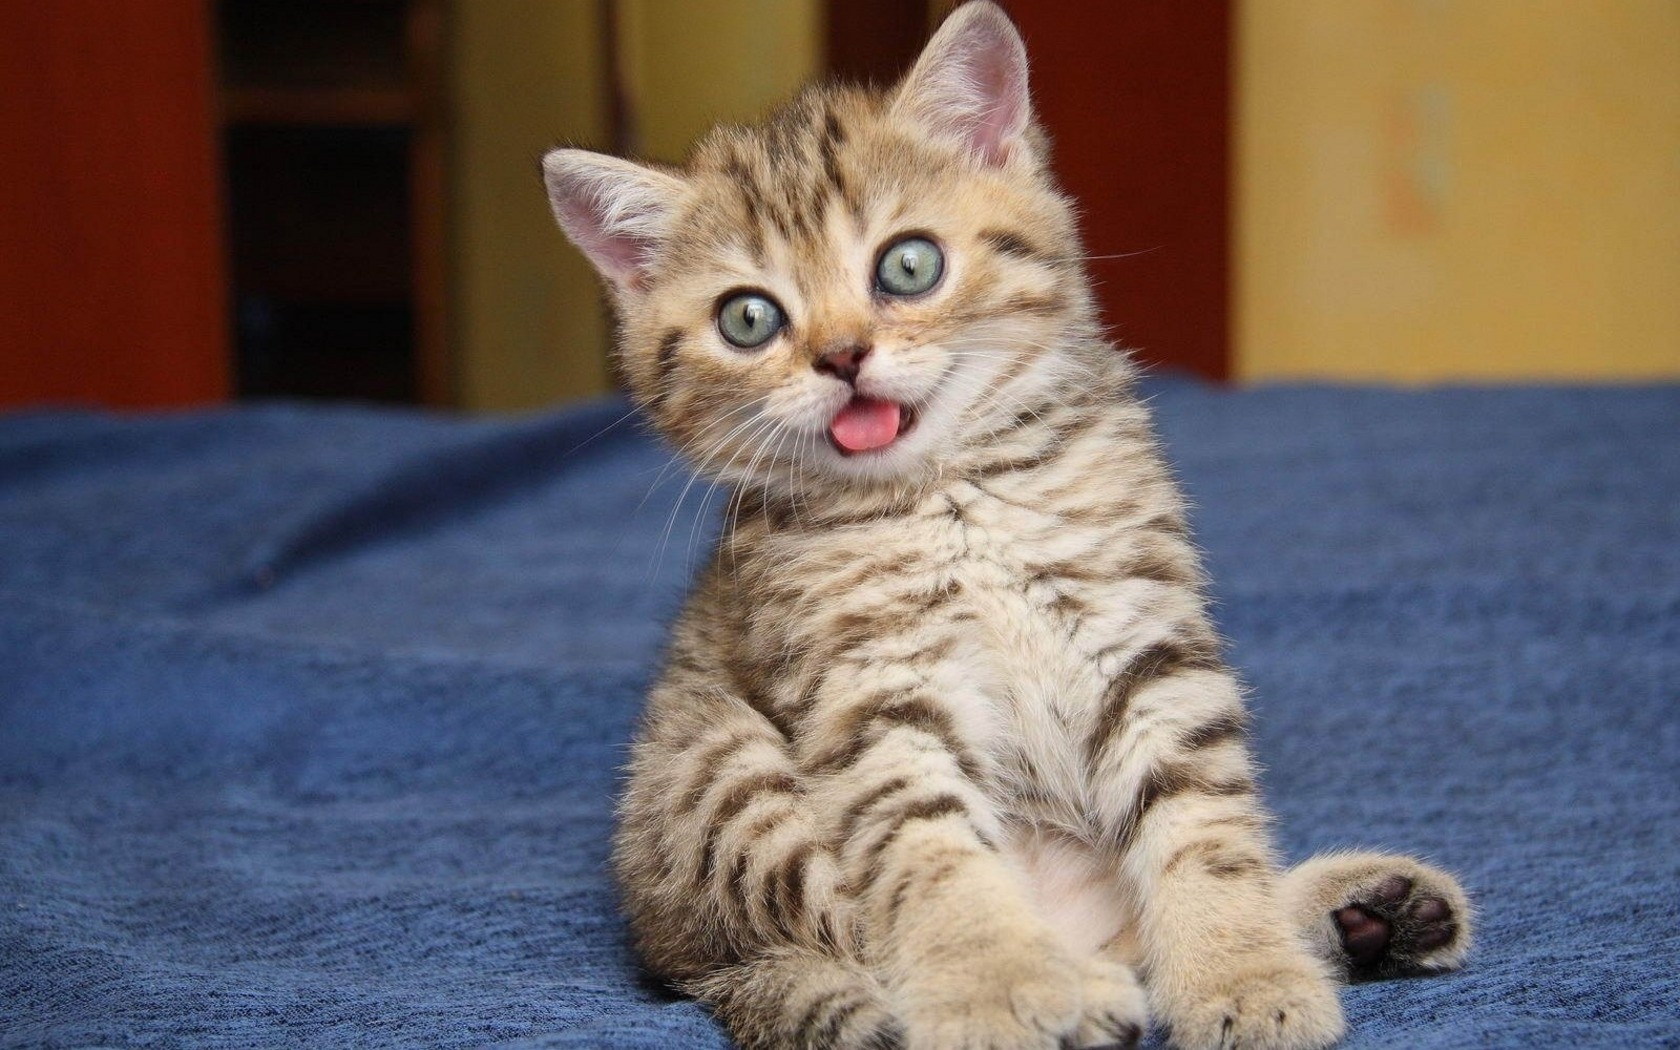

**Получение пар вершин с кратчайшим расстоянием 2**


In [ ]:
def edges_dist_2(df):
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)

  connected_components_number, ind_max_component, connected_components = dfs_and_gcc(edges, neighbours, vertexes, True)
  
  graph = get_neighbours(edges)

  d = 0
  r = 1e+10
  list_with_eccentricities = []
  distances = []
  edge_dist_2 = set()
  v1 = []
  v2 = []
  for vertex in vertexes:
      current_geo = bfs_distances(graph, vertex)
      for key, value in current_geo.items():
        if value == 2:
          v1.append(vertex)
          v2.append(key)
          edge_dist_2.add((vertex,key))
  
  data = {'v1': v1,
          'v2': v2}
  df1 = pd.DataFrame(data)
  return df1


In [ ]:
i = 1
list_of_p = list()
for df in tqdm(list_of_df):
  locals()[f'p{i}'] = edges_dist_2(df)
  list_of_p.append(locals()[f'p{i}'])
  i += 1

100%|██████████| 8/8 [04:14<00:00, 31.75s/it]


In [ ]:
# list_of_p = [p1, p2, p3, p4, p5]

In [50]:
def static_topological_features_pairs(graph,edge_dist_2,one_edge = False):
  CN = []
  AA = []
  JC = []
  PA = []
  visited = set()
  if one_edge:
      vert = edge_dist_2[0]
      node = edge_dist_2[1]
      common_neigh = graph[vert] & graph[node]
      CN.append(len(common_neigh))
      AA_ = 0
      for neigh in common_neigh:
        AA_ += 1/math.log(len(graph[neigh]))
      AA.append(AA_)
      try:
        JC.append(len(common_neigh) / len(graph[vert] | graph[node]))
      except(Exception):
        print(vert, node, graph[vert], graph[node])
      PA.append(len(graph[vert]) * len(graph[node]))
      print(CN,AA,JC,PA)
      return CN,AA,JC,PA
  else: 
    for i, row in edge_dist_2.iterrows():
      vert = row['v1']
      node = row['v2']
      common_neigh = graph[vert] & graph[node]
      CN.append(len(common_neigh))
      AA_ = 0
      for neigh in common_neigh:
        AA_ += 1/math.log(len(graph[neigh]))
      AA.append(AA_)
      try:
        JC.append(len(common_neigh) / len(graph[vert] | graph[node]))
      except(Exception):
        print(vert, node, graph[vert], graph[node])
        PA.append(len(graph[vert]) * len(graph[node]))
      print(CN,AA,JC,PA)
    return CN,AA,JC,PA

In [51]:
i = 0
for df in list_of_df: # Для каждого датасета определение макс компоненты слаб связ, диаметра + радиуса + 90 перцентиля - для n - рандомных вершин и подграфа "снежный ком"
  print("Название датасета: ", list_of_name[i])
  i += 1
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)
  neighbours = get_neighbours(edges)
  CN,AA,JC,PA = static_topological_features_pairs(neighbours,[1,2],True)
  print(CN,AA,JC,PA)


Название датасета:  test_6
[0] [0] [0.0] [9]
[0] [0] [0.0] [9]
Название датасета:  test_1
[2] [1.8204784532536746] [0.2857142857142857] [18]
[2] [1.8204784532536746] [0.2857142857142857] [18]
Название датасета:  test_2
[7] [6.130716871863356] [0.3888888888888889] [144]
[7] [6.130716871863356] [0.3888888888888889] [144]
Название датасета:  test_3
[0] [0] [0.0] [10]
[0] [0] [0.0] [10]
Название датасета:  test_4
[0] [0] [0.0] [48]
[0] [0] [0.0] [48]
Название датасета:  test_5
[0] [0] [0.0] [69]
[0] [0] [0.0] [69]
Название датасета:  team_15
[10] [2.199317809237733] [0.058823529411764705] [8064]
[10] [2.199317809237733] [0.058823529411764705] [8064]
Название датасета:  socfb-Reed98
[19] [4.724067092686206] [0.18627450980392157] [3504]
[19] [4.724067092686206] [0.18627450980392157] [3504]
Название датасета:  socfb-Middlebury45
[2] [0.3824839729980579] [0.011049723756906077] [8262]
[2] [0.3824839729980579] [0.011049723756906077] [8262]


In [ ]:
def insert_into_df(df, edges_with_сombining):
  weights = list()
  
  for _, edge in df.iterrows():
    edge_w = list()
    tmp = edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]
    for type1 in ['lin', 'exp', 'sqrt']:
      for type2 in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        for type3 in ['sum', 'abs_diff', 'min', 'max']:
          edge_w.append(tmp[type1][type2][type3])

    weights.append(edge_w)
    
  edges_with_сombining = None
  column = ["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","f31","f32","f33","f34","f35","f36","f37","f38","f39","f40","f41","f42","f43","f44","f45","f46","f47","f48","f49","f50","f51","f52","f53","f54","f55","f56","f57","f58","f59","f60","f61","f62","f63","f64","f65","f66","f67","f68","f69","f70","f71","f72","f73","f74","f75","f76","f77","f78","f79","f80","f81","f82","f83"]
  tmp_df = pd.DataFrame(weights, columns = column )
  df = pd.concat([df, tmp_df], axis = 1)
  return df


In [ ]:
def part_2(df_b_array, df_g_array, list_of_name, df_for_fichers):
  i = 0
  list_result_df = list()

  for df_b, df_g, df_f in zip(df_b_array, df_g_array, df_for_fichers):
    print("Название датасета: ", list_of_name[i])
    l = 0.2
    t_min = df_f.timestamp.min()
    t_max = df_f.timestamp.max()
    delta_t = t_max - t_min

    df_f = df_f.sort_values(by=['timestamp'])
    vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df_f)
    edges_with_params, nodes_with_params, edges_with_сombining, result_df = get_params(df_f, df_b, df_g, edges)
    
    get_temporal_weighting(df_f, edges_with_params, l, t_min, delta_t)
    fill_nodes(edges_with_params, nodes_with_params)
    quantiles_plus(edges_with_params, nodes_with_params)
    combining_node_activity(edges_with_сombining, nodes_with_params)
    result_df = insert_into_df(result_df, edges_with_сombining)
    print('------------------------------------------------------------------------------------------')
    list_result_df.append(result_df)

    i +=1
    print()
  return list_result_df


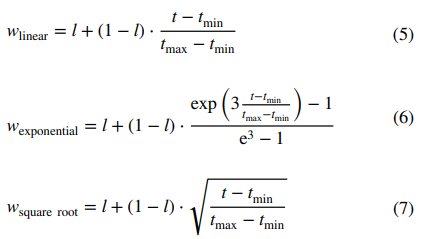

In [ ]:
def get_sub_f(t, t_min, delta_t):
  return (t - t_min) / delta_t

def get_w_lin(l, sub_f):
  return l + (1 - l) * sub_f

def get_w_exp(l, sub_f):
  return l + (1 - l) * (math.exp(3 * sub_f) - 1) / (math.pow(math.e, 3) - 1)

def get_w_sqrt(l, sub_f):
  return l + (1 - l) * math.sqrt(sub_f)


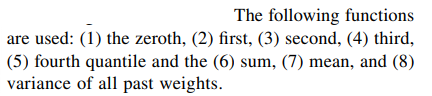

In [ ]:
def get_zeroth(w):
  return np.min(w)

def get_first(w):
  return np.quantile(w, .25)

def get_second(w):
  return np.median(w)

def get_third(w):
  return np.quantile(w, .75)

def get_fourth(w):
  return w[-1]

def get_sum(w):
  return np.sum(w)

def get_mean(w):
  return np.mean(w)


In [ ]:
# 4.1.3
def get_params(graph, graph_1, graph_2, edges):
  all_nodes = np.sort(adj_graph(graph).v1.unique())
  posibility_edges = itertools.combinations_with_replacement(all_nodes, 2)
  temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
  quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
  сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

  params = {'lin': {'w_lin': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}},
            'exp': {'w_exp': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}},
            'sqrt': {'w_sqrt': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}}} 

  params2 = {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}
            
  params3 = {'lin': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}, 
             'exp': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}, 
             'sqrt': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}}



  choice_1 = np.random.randint(0, graph_1.shape[0], 10000)
  choice_2 = np.random.randint(0, graph_2.shape[0], 10000)

  graph_1['result'] = 0
  graph_2['result'] = 1
  
  result_df = pd.concat([graph_1.iloc[choice_1], graph_2.iloc[choice_2]], sort=False, ignore_index=True, axis=0)
  
  edges_with_params = defaultdict(None)
  nodes_with_params = defaultdict(None)
  edges_with_сombining = defaultdict(None)

  for edge in edges:
    edges_with_params[edge] = deepcopy(temporal_weighting)
  for node in all_nodes:
    nodes_with_params[node] = deepcopy(params)
  for _, edge in result_df.iterrows():
    edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))] = deepcopy(params3)

  return edges_with_params, nodes_with_params, edges_with_сombining, result_df

In [ ]:
def time_normalization(timestemp, t_min, delta_t):
  return (timestemp - t_min) / delta_t

In [ ]:
# 4.1.3
def get_temporal_weighting(graph, edges_with_params, l, t_min, delta_t):
  for _, edge in graph.iterrows():
    params = edges_with_params[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]

    norm_t = time_normalization(edge.timestamp, t_min, delta_t)
    sub_f = get_sub_f(norm_t, 0, 1)

    params['w_lin'].append(get_w_lin(l, sub_f))
    params['w_exp'].append(get_w_exp(l, sub_f))
    params['w_sqrt'].append(get_w_sqrt(l, sub_f))


In [ ]:
# 4.1.3
def fill_nodes(edges_with_params, nodes_with_params):
  for key in edges_with_params:
    params = edges_with_params[key]
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[u][w_type]['w_' + w_type].extend(params['w_' + w_type])
      nodes_with_params[v][w_type]['w_' + w_type].extend(params['w_' + w_type])

    params = None 
    
  for key in nodes_with_params:
    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[key][w_type]['w_' + w_type].sort()


In [ ]:
# 4.1.3
# temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
# quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def quantiles_plus(edges_with_params, nodes_with_params):
  fill_nodes(edges_with_params, nodes_with_params)

  for key in nodes_with_params:
    params = nodes_with_params[key]

    for w_type in ['lin', 'exp', 'sqrt']:
      tmp = params[w_type]['quant_p']
      tmp2 = params[w_type]['w_' + w_type]

      tmp['zeroth'] = get_zeroth(tmp2)
      tmp['first'] = get_first(tmp2)
      tmp['second'] = get_second(tmp2)
      tmp['third'] = get_third(tmp2)
      tmp['fourth'] = get_fourth(tmp2)
      tmp['sum'] = get_sum(tmp2)
      tmp['mean'] = get_mean(tmp2)

In [ ]:
def get_sum_c(a, b):
  return a + b
  
def get_abs_diff(a, b):
  return abs(a - b)
  
def get_min(a, b):
  return min(a, b)
  
def get_max(a, b):
  return max(a, b)

In [ ]:
# 4.1.3
# params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
#            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
#            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
#            'mean': deepcopy(сombining)}

def combining_node_activity(edges_with_сombining, nodes_with_params):
  for key in edges_with_сombining:
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      edge = edges_with_сombining[key][w_type]
      u_node = nodes_with_params[u][w_type]['quant_p']
      v_node = nodes_with_params[v][w_type]['quant_p']
    
      for p_type in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        p_edge = edge[p_type]
        p_u_node = u_node[p_type]
        p_v_node = v_node[p_type]
        p_edge['sum'] = get_sum_c(p_u_node, p_v_node) 
        p_edge['abs_diff'] = get_abs_diff(p_u_node, p_v_node) 
        p_edge['min'] = get_min(p_u_node, p_v_node) 
        p_edge['max'] = get_max(p_u_node, p_v_node) 

In [ ]:
list_of_before, list_of_after = [], []
for df in list_of_df:
  # print(df.head(1))
  # list_of_before.append(df[df.timestamp <= np.quantile(df.timestamp, q = 0.7)])
  # list_of_after.append(df[df.timestamp > np.quantile(df.timestamp, q = 0.7)])
  list_of_before.append(df[df.index <= np.quantile(df.index, q = 0.7)])
  list_of_after.append(df[df.index > np.quantile(df.index, q = 0.7)])

In [ ]:
def get_dist_2_edges(list_of_df):
  list_of_dist_2_df = list()
  for df in tqdm(list_of_df):
    list_of_dist_2_df.append(edges_dist_2(df))
  return list_of_dist_2_df# список дф_before в каждом из которых расстояние между двумя вершинами 2


In [ ]:
list_of_before_2 = get_dist_2_edges(list_of_before)

100%|██████████| 8/8 [02:39<00:00, 19.92s/it]


негативные примеры
посчитать фичи на лист оф бефор для негативных и позитивных ребер
разделить и обучить

In [ ]:
# какие вершины из лист оф бефоре 2 появились в листо оф афтер
list_of_good = []
for b2,a in zip(list_of_before_2, list_of_after):
  # print(b2.shape[0], a.shape[0])
  list_of_good.append(pd.merge(b2, a, how = 'inner', on = ['v1','v2']))

list)of)good - ребра появятся после timestamp


In [ ]:
list_of_bad = []
for b2, a in zip(list_of_before_2, list_of_good):
  # print(b2.shape[0], a.shape[0])
  list_of_bad.append(pd.concat([b2, a]).drop_duplicates(keep=False))

In [ ]:
list_of_bad[0]# timestamp есть если ребра появились до но не пояивлись потом

In [ ]:
list_of_good[0]# это позитивные примеры

In [ ]:
list_result_df = part_2(list_of_bad, list_of_good, list_of_name, list_of_before)

In [ ]:
list_result_df[0]

In [ ]:
def choice(list_graph_1, list_graph_2):
  list_result_df = list()
  for graph_1, graph_2 in zip(list_graph_1, list_graph_2):
    choice_1 = np.random.randint(0, graph_1.shape[0], 10000)
    choice_2 = np.random.randint(0, graph_2.shape[0], 10000)

    graph_1['result'] = 0
    graph_2['result'] = 1
    
    result_df = pd.concat([graph_1.iloc[choice_1], graph_2.iloc[choice_2]], sort=False, ignore_index=True, axis=0)
    list_result_df.append(result_df)
  return list_result_df

In [ ]:
list_result_df = choice(list_of_bad, list_of_good)

In [ ]:
for df, p in tqdm(zip(list_of_before, list_result_df)):
  # print(df.head(1))
  edges = sorted(set(zip((df[['v1','v2']]).min(axis = 1), (df[['v1','v2']]).max(axis = 1))))
  neighbours = get_neighbours(edges)
  p['CN'], p['AA'], p['JC'], p['PA'] = static_topological_features_pairs(neighbours,p)


8it [00:11,  1.40s/it]


In [ ]:
list_result_df[1]

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import ast

In [ ]:
cols=[ 'CN', 'AA', 'JC', 'PA', 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'] 


In [ ]:
cols_static=[ 'CN', 'AA', 'JC', 'PA'] 

In [ ]:
cols_temporal = [ 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'] 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
def logReg(list_result_df, cols, list_of_name):
  figure1, axis1 = plt.subplots(3, 5)
  figure2, axis2 = plt.subplots(3, 5)
  i = 1
  for p, name in zip(list_result_df, list_of_name):
    X=p[cols]
    y=p['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    res = logreg.predict_proba(X_test)
    y_predict = logreg.predict(X_test)


    fig, axs = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(x, y)
    axs[1].plot(x, -y)

    cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
    axs[0] = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=logreg.classes_)
    axs[0].plot(i//3, i/5)
    # plt.show()

    lr_auc = roc_auc_score(y_test, res[:,1])
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, res[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    axs[1].plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[1].xlim([0.0, 1.0])
    axs[1].ylim([0.0, 1.05])
    axs[1].xlabel('False Positive Rate')
    axs[1].ylabel('True Positive Rate')
    axs[1].legend(loc="lower right")
    
    fig.suptitle(list_of_name[i])
    plt.show()

    print('Название датсета:', name)
    print(metrics.roc_auc_score(y_test, res[:,1]))
    print('------------------------------------')

In [ ]:
def logReg(list_result_df, cols, list_of_name):
  for p, name in zip(list_result_df, list_of_name):
    X=p[cols]
    y=p['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    res = logreg.predict_proba(X_test)
    y_predict = logreg.predict(X_test)

    #figure, axis = plt.subplots(5, 3)
    cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=logreg.classes_)
    disp.plot()
    plt.show()

    lr_auc = roc_auc_score(y_test, res[:,1])
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, res[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(list_of_name)
    plt.legend(loc="lower right")
    plt.show()

    print('Название датсета:', name)
    print(metrics.roc_auc_score(y_test, res[:,1]))
    print('------------------------------------')
    

In [ ]:
def logReg(list_result_df, cols, list_of_name):
  figure1, axis1 = plt.subplots(3, 5)
  figure2, axis2 = plt.subplots(3, 5)
  i = 1
  for p, name in zip(list_result_df, list_of_name):
    X=p[cols]
    y=p['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    res = logreg.predict_proba(X_test)
    y_predict = logreg.predict(X_test)


    fig, axs = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(x, y)
    axs[1].plot(x, -y)

    cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
    axs[0] = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=logreg.classes_)
    axs[0].plot(i//3, i/5)
    # plt.show()

    lr_auc = roc_auc_score(y_test, res[:,1])
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, res[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    axs[1].plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[1].xlim([0.0, 1.0])
    axs[1].ylim([0.0, 1.05])
    axs[1].xlabel('False Positive Rate')
    axs[1].ylabel('True Positive Rate')
    axs[1].legend(loc="lower right")
    
    fig.suptitle(list_of_name[i])
    plt.show()

    print('Название датсета:', name)
    print(metrics.roc_auc_score(y_test, res[:,1]))
    print('------------------------------------')

	Статические


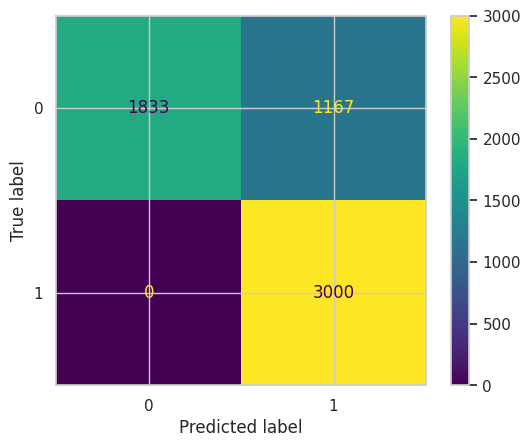

LogisticRegression: ROC AUC=0.805


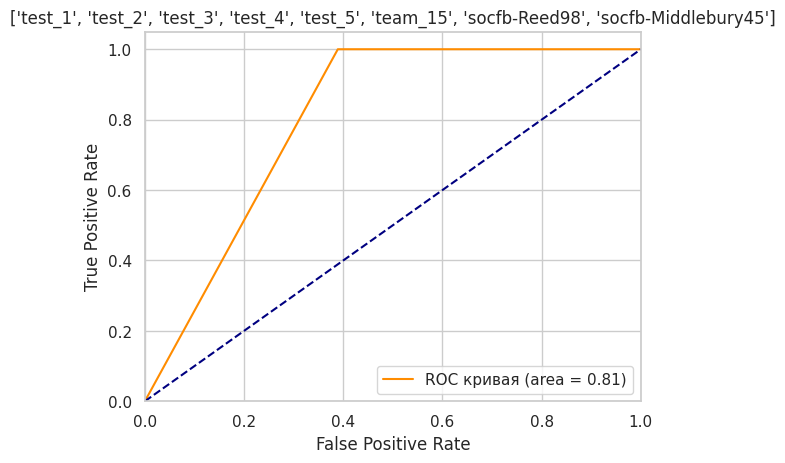

Название датсета: test_1
0.8055
------------------------------------


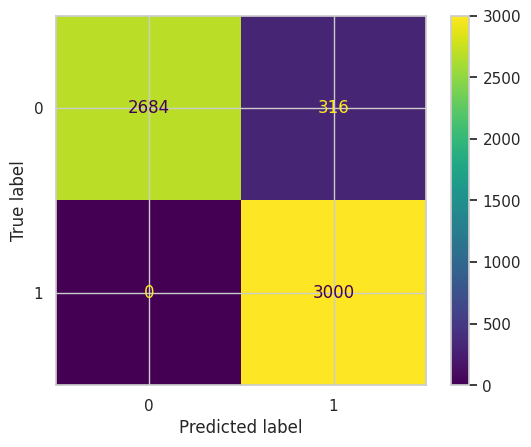

LogisticRegression: ROC AUC=0.937


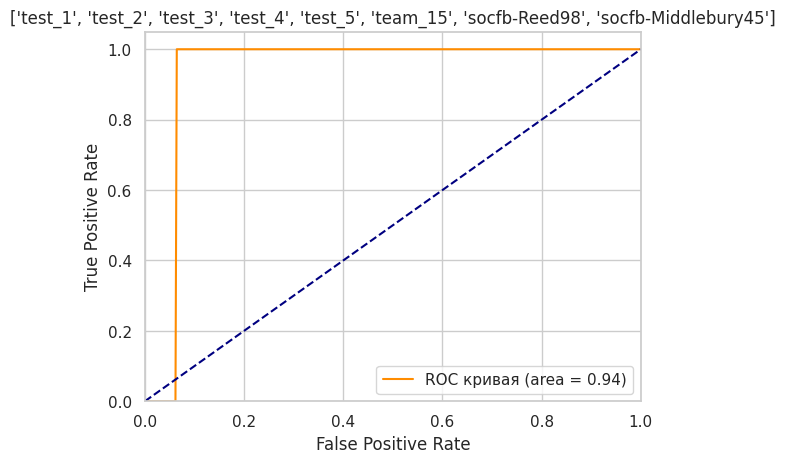

Название датсета: test_2
0.937
------------------------------------


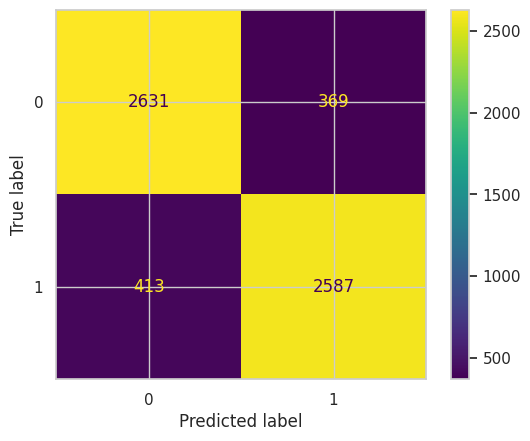

LogisticRegression: ROC AUC=0.951


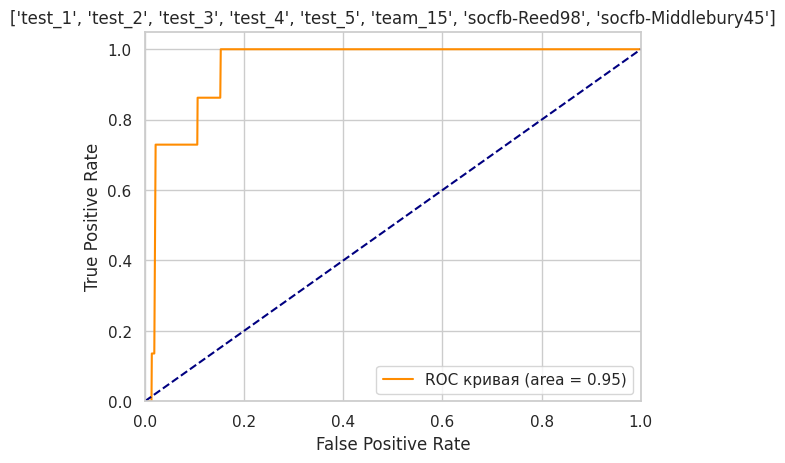

Название датсета: test_3
0.9509539444444444
------------------------------------


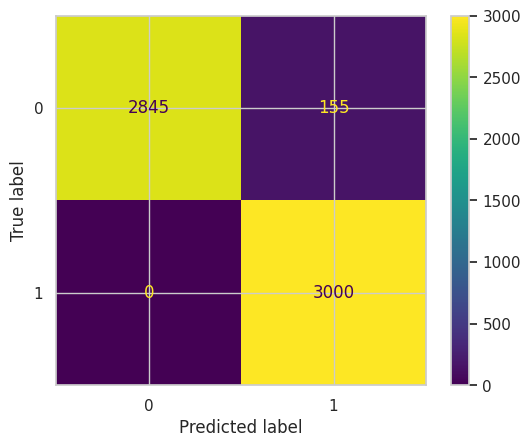

LogisticRegression: ROC AUC=0.982


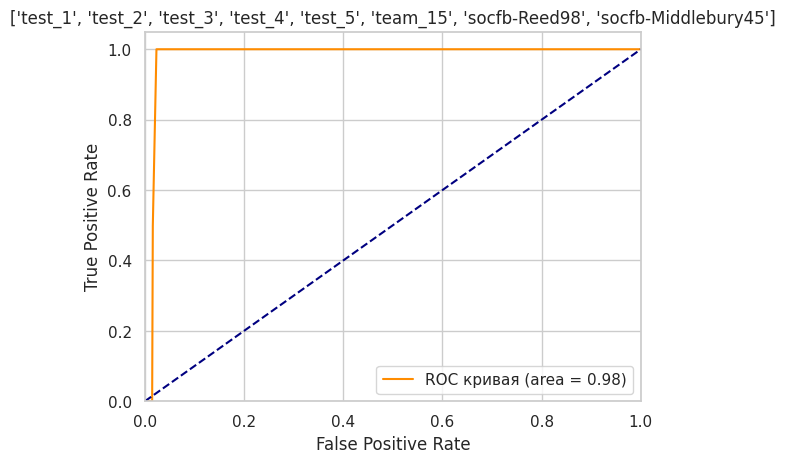

Название датсета: test_4
0.9824913333333334
------------------------------------


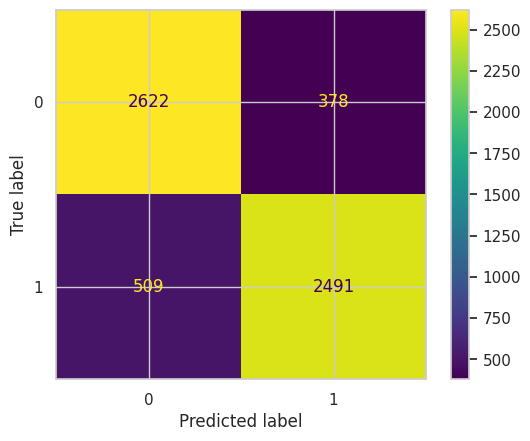

LogisticRegression: ROC AUC=0.926


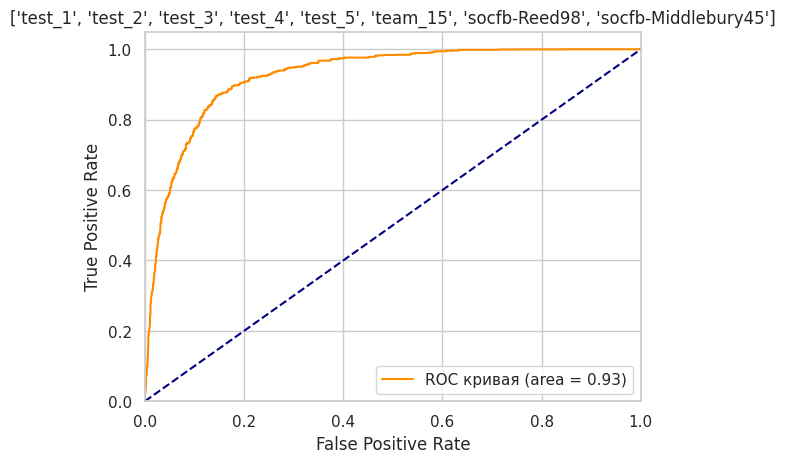

Название датсета: test_5
0.9256454444444444
------------------------------------


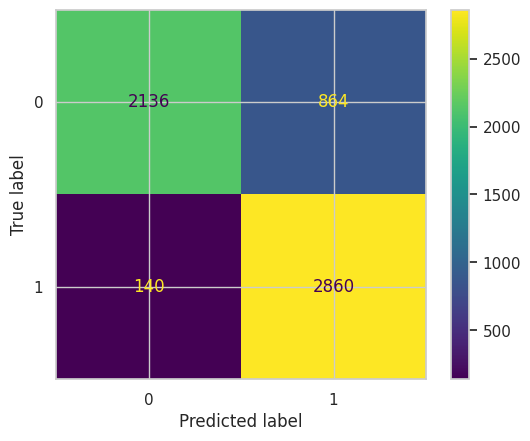

LogisticRegression: ROC AUC=0.842


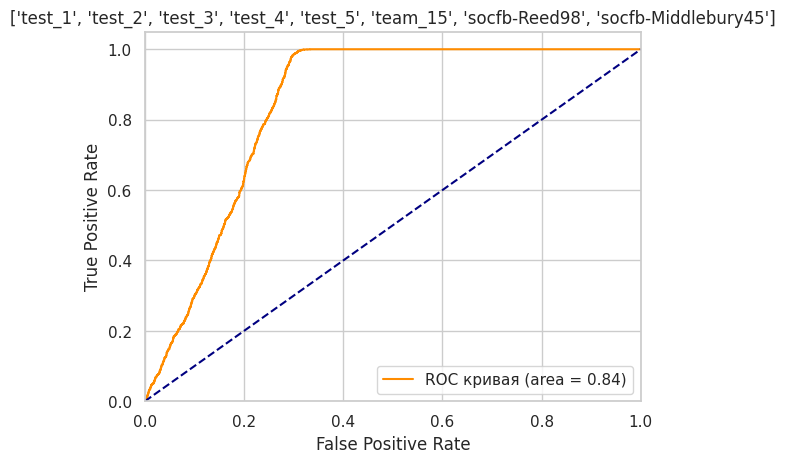

Название датсета: team_15
0.8424899444444444
------------------------------------


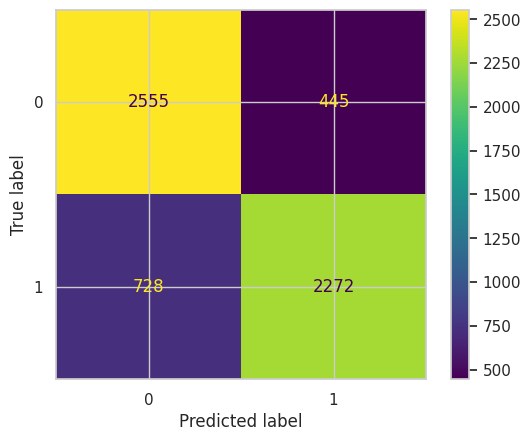

LogisticRegression: ROC AUC=0.887


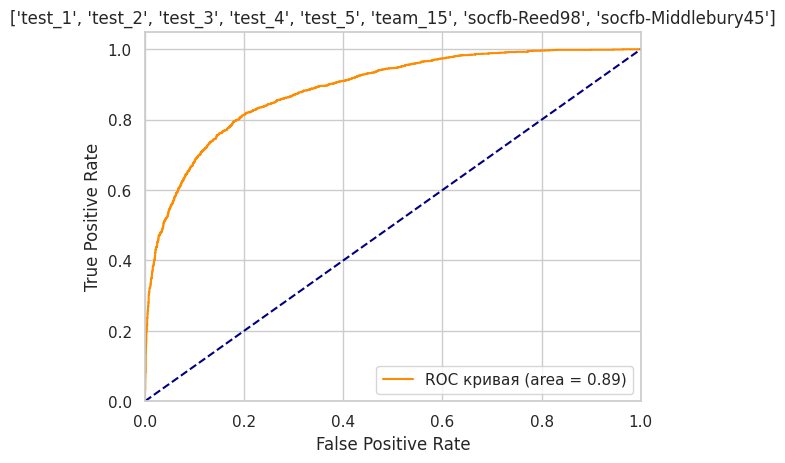

Название датсета: socfb-Reed98
0.8867989444444443
------------------------------------


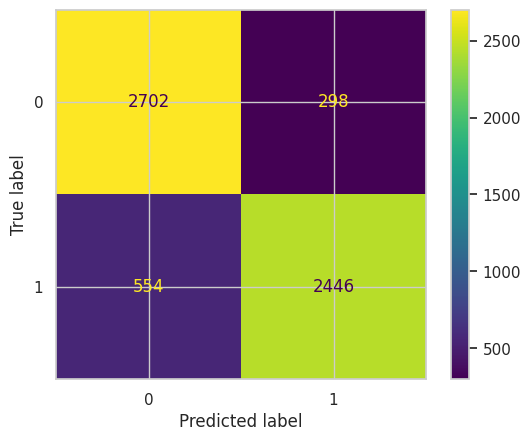

LogisticRegression: ROC AUC=0.934


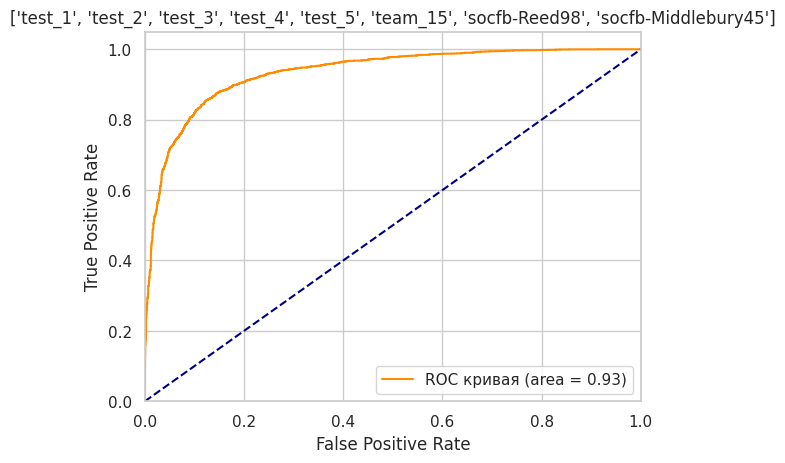

Название датсета: socfb-Middlebury45
0.9340086111111112
------------------------------------



In [ ]:
# for c, t in [(cols, '\tСмешанные'), (cols_static, '\tСтатические'), (cols_temporal, '\tВременные')]:
for c, t in [(cols_static, '\tСтатические')]:
  print(t)
  logReg(list_result_df, c, list_of_name)
  print()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
for p, name in zip(list_result_df, list_of_name):
  matplotlib.rcParams['savefig.dpi'] = 1000
  fig, ax = plt.subplots(figsize=(10,10))  
  sns.set(font_scale=0.5)   
  sns.heatmap(p[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1)), yticklabels=p[cols + ['result']].corr()['result'].index, ax=ax)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_predict)

ValueError: ignored

In [ ]:
>>> 
>>> y_true = [2, 0, 2, 2, 0, 1]
>>> y_pred = [0, 0, 2, 2, 0, 2]
>>> confusion_matrix(y_true, y_pred)

In [ ]:
for p in list_result_df:
  X=p[cols]
  y=p['result']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  res = logreg.predict_proba(X_test)
  print("ROCAUC")
  print(metrics.roc_auc_score(y_test, res[:,1]))
  print

ROCAUC
0.8626110555555555
ROCAUC
0.8810643888888889
ROCAUC
0.9560036666666666
ROCAUC
0.9551271666666667
ROCAUC
0.8664972222222221


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
p4[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1000
fig, ax = plt.subplots(figsize=(10,10))  
sns.set(font_scale=0.5)   
sns.heatmap(p4[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1)), yticklabels=p4[cols + ['result']].corr()['result'].index, ax=ax)


In [ ]:
# p1.to_csv('/content/drive/MyDrive/graph_datasets_final/opsahl-ucsocial_p1', index = False)
# p2.to_csv('/content/drive/MyDrive/graph_datasets_final/radoslaw_email_email_p2', index = False)
# p3.to_csv('/content/drive/MyDrive/graph_datasets_final/soc-sign-bitcoinotc_p3', index = False)
# p4.to_csv('/content/drive/MyDrive/graph_datasets_final/dnc-corecipient_p4', index = False)
# p5.to_csv('/content/drive/MyDrive/graph_datasets_final/email-Eu-core-temporal_p5', index = False)

In [ ]:
list_of_name = ["opsahl-ucsocial_p1", "radoslaw_email_email_p2","soc-sign-bitcoinotc_p3","dnc-corecipient_p4", 'email-Eu-core-temporal_p5']

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

for i in range(len(list_of_name)):
    filename = '/content/drive/MyDrive/graph_datasets_final/' + list_of_name[i]
    print(filename)
    locals()[f'p{i+1}'] = pd.read_csv(filename)

In [ ]:
#p1.corr()['result']

In [ ]:
res[:,0]

In [ ]:
X

In [ ]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

corr = p1.corr()
sns.heatmap(corr, 
        xticklabels=X.columns,
        yticklabels=y)